<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/class-activities/PLA_and_Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import matplotlib.pyplot as plt
import numpy as np

w0, w1, w2 = 1, 0, 1


best_w0, best_w1, best_w2 = w0, w1, w2


x1, x2, y = [], [], []


In [117]:
def file_read(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(int(values[2]))

In [118]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

In [119]:
def PLA():
    global w0,w1,w2
    for i in range(50):
        misclassified = misclassified_points()
        if not misclassified:
            break
        x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
        w0 += y_misclassified
        w1 += y_misclassified * x1_misclassified
        w2 += y_misclassified * x2_misclassified
    print(w0,w1,w2)

In [120]:
file_read('synthetic_dataset.csv')
PLA()
print(w0,w1,w2)


21 10.678992023000006 11.63060872200001
21 10.678992023000006 11.63060872200001


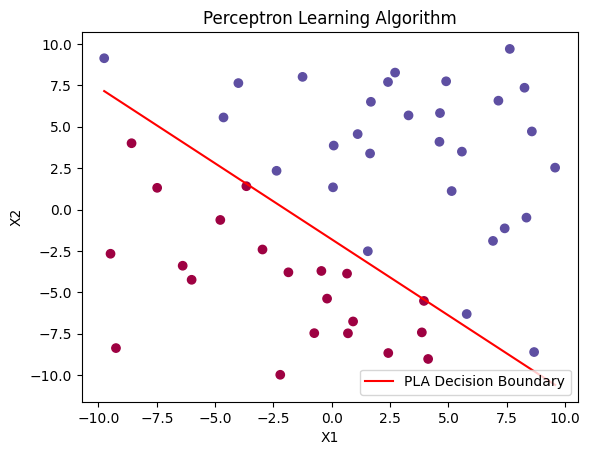

In [121]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x_line_PLA = np.linspace(min(x1), max(x1), 100)
y_line_PLA = (-w0 - w1 * x_line_PLA) / w2
plt.plot(x_line_PLA, y_line_PLA, label='PLA Decision Boundary',color = 'red')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.legend(loc='lower right')

plt.show()


In [131]:
def Pocket():
    global best_misclassified_count
    best_misclassified_count = len(x1)
    global best_w0,best_w1,best_w2
    v0, v1, v2 = 1, 0, 1
    best_w0, best_w1, best_w2 = v0,v1,v2

    for i in range(50):
        misclassified = misclassified_points()  # Implement misclassified_points() function
        for i in range(len(x1)):
            if (v0 + v1 * x1[i] + v2 * x2[i]) * y[i] <= 0:
                x1_misclassified = x1[i]
                x2_misclassified = x2[i]
                y_misclassified = y[i]
                v0 += y_misclassified
                v1 += y_misclassified * x1_misclassified
                v2 += y_misclassified * x2_misclassified

                if len(misclassified) < best_misclassified_count:
                    best_w0, best_w1, best_w2 = v0, v1, v2

        if len(misclassified) == 0:
            break

    print("Pocket Algorithm:")
    print("Best Weights:", best_w0, best_w1, best_w2)
    print("Number of Misclassifications:", best_misclassified_count)

Pocket()

Pocket Algorithm:
Best Weights: 5 3.3308039030000014 13.55429096
Number of Misclassifications: 50


5 3.3308039030000014 13.55429096


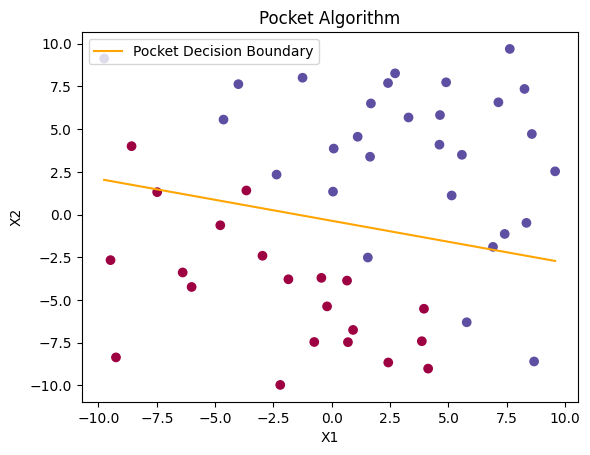

In [126]:
x_line_Pocket = np.linspace(min(x1), max(x1), 100)
y_line_Pocket = (-best_w0 - best_w1 * x_line_Pocket) / best_w2
print(best_w0,best_w1,best_w2)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)
plt.plot(x_line_Pocket, y_line_Pocket, label='Pocket Decision Boundary',color = 'orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pocket Algorithm')
plt.legend(loc='upper left')

plt.show()